In [4]:
!pip install split_folders

  Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)


In [2]:
!unzip IMG_CLASSES_selected.zip

Archive:  IMG_CLASSES_selected.zip
   creating: IMG_CLASSES_selected/
   creating: IMG_CLASSES_selected/Atopic Dermatitis/
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_0.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_1.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_10.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_11.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_12.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_13.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_14.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_15.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_16.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_17.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_18.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_19.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_2.jpg  
  inflating: IMG_CLASSES_selected/Atopic Dermatitis/0_3.jpg  

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import splitfolders
import os

In [7]:
os.makedirs('im_output')
os.makedirs('im_output/train')
os.makedirs('im_output/val')
os.makedirs('im_output/test')

loc = "/content/IMG_CLASSES_selected";
splitfolders.ratio(loc,output ="im_output",ratio = (0.80,.1,.1))

Copying files: 564 files [00:00, 1656.43 files/s]


In [8]:
def random_image(val_dir,val_class):
    folder = val_dir +val_class
    random_image = random.sample(os.listdir(folder),1)
    img = mping.imread(folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(val_class)
    return img

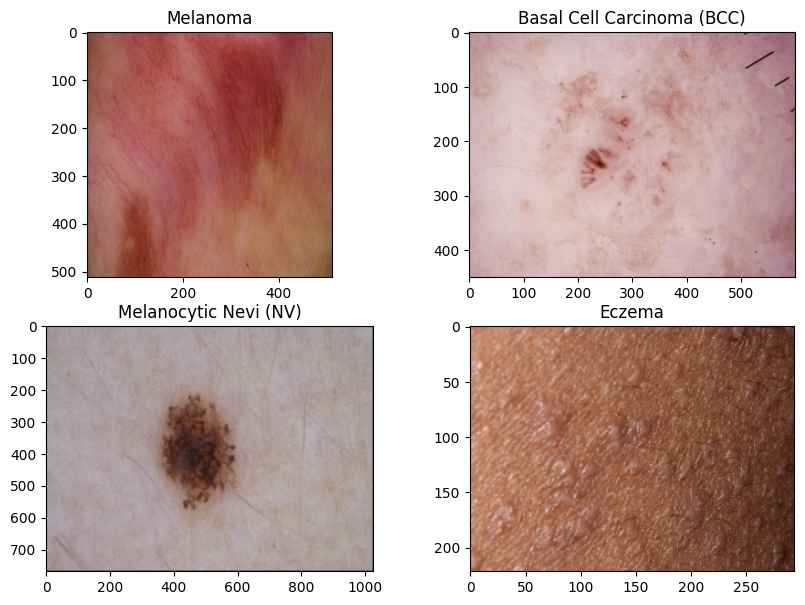

In [9]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./im_output/val/",val_class = "Melanoma")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./im_output/val/",val_class = "Basal Cell Carcinoma (BCC)")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./im_output/val/",val_class = "Melanocytic Nevi (NV)")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./im_output/val/",val_class = "Eczema")


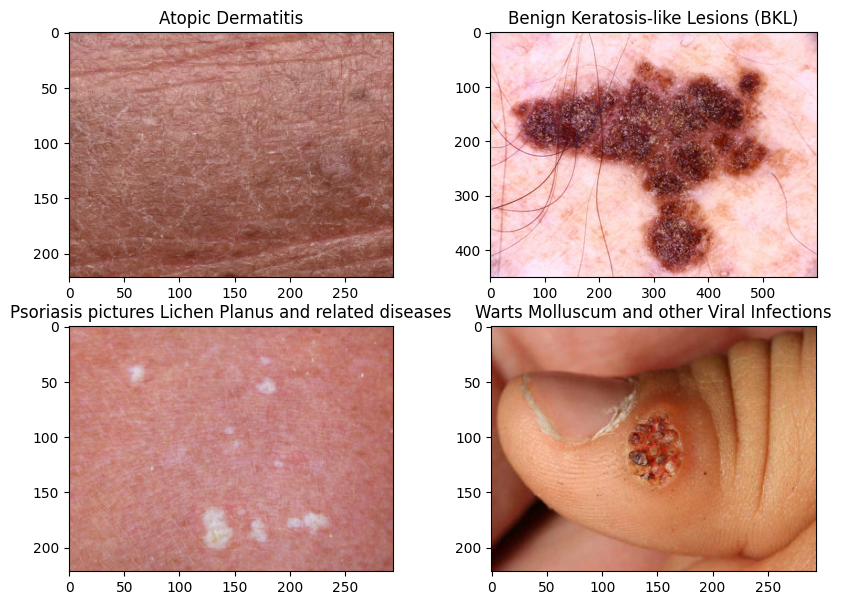

In [10]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./im_output/val/",val_class = "Atopic Dermatitis")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./im_output/val/",val_class = "Benign Keratosis-like Lesions (BKL)")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./im_output/val/",val_class = "Psoriasis pictures Lichen Planus and related diseases")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./im_output/val/",val_class = "Warts Molluscum and other Viral Infections")

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental import preprocessing

In [12]:


train_dir = "./im_output/train"
test_dir =  "./im_output/test"
val_dir = "./im_output/val"


train_data = image_dataset_from_directory(train_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = True,seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)

Found 446 files belonging to 10 classes.
Found 66 files belonging to 10 classes.
Found 52 files belonging to 10 classes.


In [13]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 6,
                                             min_delta = 0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",factor = 0.2,
                                                patience = 4,min_lr = 1e-7)


In [14]:
model = tf.keras.applications.EfficientNetB7(include_top = False)
model.trainable = False

258076736/258076736 [==============================] - 7s 0us/step


In [15]:
data_aug = tf.keras.Sequential([
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip("horizontal")
],name = "data_augmentation_layer")

In [16]:
inputs = layers.Input(shape = (224,224,3),name = "input_layer")
x = data_aug(inputs)
x = model(x)
x = layers.GlobalAvgPool2D(name = "pooling_layer")(x)
# parameter used to specify the size of the output generated from the layer.
x = layers.Dense(32,activation = "relu",kernel_initializer = tf.keras.initializers.he_normal())(x)
x = layers.Dense(10)(x)
outputs = layers.Activation("softmax",dtype = tf.float32)(x)
model = tf.keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation_layer (S  (None, None, None, 3)     0         
 equential)                                                      
                                                                 
 efficientnetb7 (Functional  (None, None, None, 2560   64097687  
 )                           )                                   
                                                                 
 pooling_layer (GlobalAvera  (None, 2560)              0         
 gePooling2D)                                                    
                                                                 
 dense (Dense)               (None, 32)                81952     
                                                             

In [17]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = ["accuracy"])

In [18]:
history_1= model.fit(train_data,epochs =20 , validation_data = val_data,
                      callbacks = [early_stop,reduce_lr])

Epoch 1/20
14/14 [==============================] - 46s 1s/step - loss: 2.0143 - accuracy: 0.2444 - val_loss: 1.8852 - val_accuracy: 0.2885 - lr: 0.0010
Epoch 2/20
14/14 [==============================] - 7s 455ms/step - loss: 1.4882 - accuracy: 0.4753 - val_loss: 1.6510 - val_accuracy: 0.3654 - lr: 0.0010
Epoch 3/20
14/14 [==============================] - 8s 514ms/step - loss: 1.2427 - accuracy: 0.5605 - val_loss: 1.5070 - val_accuracy: 0.3654 - lr: 0.0010
Epoch 4/20
14/14 [==============================] - 7s 477ms/step - loss: 1.0564 - accuracy: 0.6368 - val_loss: 1.4362 - val_accuracy: 0.4808 - lr: 0.0010
Epoch 5/20
14/14 [==============================] - 7s 456ms/step - loss: 0.9620 - accuracy: 0.6682 - val_loss: 1.4648 - val_accuracy: 0.4808 - lr: 0.0010
Epoch 6/20
14/14 [==============================] - 7s 474ms/step - loss: 0.8972 - accuracy: 0.7175 - val_loss: 1.4342 - val_accuracy: 0.4423 - lr: 0.0010
Epoch 7/20
14/14 [==============================] - 7s 454ms/step - loss

In [19]:
print("Testing Accuracy",model.evaluate(test_data))

3/3 [==============================] - 2s 762ms/step - loss: 0.8939 - accuracy: 0.6970
Testing Accuracy [0.8938784003257751, 0.6969696879386902]


In [20]:
model.save('my_model.h5')
model.save('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [55]:
import numpy as np
image = tf.keras.preprocessing.image.load_img('/content/im_output/test/Benign Keratosis-like Lesions (BKL)/ISIC_0026016.jpg', target_size=(224,224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 224, 224, 3)


In [37]:
my_model = tf.keras.models.load_model('/content/my_model.keras')


KeyboardInterrupt: 

In [56]:
prediction = my_model.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 41ms/step


(array([[0.00244921, 0.04036087, 0.70044905, 0.00267873, 0.05542029,
         0.17881075, 0.00638386, 0.00103162, 0.01092415, 0.00149151]],
       dtype=float32),
 (1, 10))

In [57]:
result_index = np.argmax(prediction)
result_index

2

In [44]:
class_name = [
 'Atopic Dermatitis' ,
 'Basal Cell Carcinoma (BCC)',
 'Benign Keratosis-like Lesions (BKL)',
 'Eczema',
 'Melanocytic Nevi (NV)',
 'Melanoma',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Seborrheic Keratoses and other Benign Tumors',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Warts Molluscum and other Viral Infections'
]


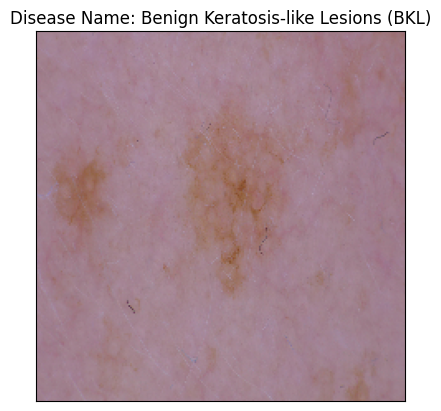

'Benign Keratosis-like Lesions (BKL)'

In [58]:
model_prediction = class_name[result_index]
plt.imshow(image)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
model_prediction

Development using python

In [59]:
!pip install Flask
!pip install pyngrok


In [60]:
from flask import Flask, request, jsonify, render_template
from pyngrok import ngrok


In [62]:
!unzip templates.zip

Archive:  templates.zip
   creating: template/
  inflating: template/index.html     


In [64]:
import tensorflow as tf
from PIL import Image
import io
import numpy as np

# Initialize Flask app
app = Flask(__name__)
ngrok.set_auth_token("2h8XAmThFGSWNOjtpdYIFZttoFQ_3QwGKHDDHFu76L2oqyKKt")
publicurl = ngrok.connect(5000).public_url
# Load your trained model
model = tf.keras.models.load_model('/content/my_model.h5')

# Function to process the uploaded image
def process_image(file):
    image = Image.open(file)
    image = image.resize((224, 224))  # Assuming model input size is 224x224
    image = np.array(image)
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Define routes
@app.route('/')
def home():
    return render_template('template/index.html')
      # return f"Hello app is running"
print(f"To access global : {publicurl}")
@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return "No file part"
    file = request.files['file']
    if file.filename == '':
        return "No selected file"
    if file:
        image = process_image(file)
        prediction = model.predict(image)
        return jsonify({'prediction': prediction.tolist()})

# Run the app

app.run(port=5000)


To access global : https://5ff3-34-147-112-50.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
ERROR:__main__:Exception on / [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.10/dist-packages/flask/app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "<ipython-input-64-16012812c37a>", line 24, in home
    return render_template('template/index.html')
  File "/usr/local/lib/python3.10/dist-packag

In [ ]:
ngrok.kill()